In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.neighbors import BallTree
import requests
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

Téléchargement des données : 2015 - 2020
*   Données Train : 2015 - 2019
*   Données Test : 2020

-------------------------------------

Data download: 2015 - 2020
* Train data: 2015 - 2019
* Test data: 2020





In [ ]:
df_2015 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2015/full.csv.gz")
df_2016 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2016/full.csv.gz")
df_2017 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2017/full.csv.gz")
df_2018 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2018/full.csv.gz")
df_2019 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2019/full.csv.gz")
df_2020 = pd.read_csv("https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2020/full.csv.gz")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,26,35,36) have mixed types.Specify dtype option on imp

Découverte des données

-----------------------------------------

Data discovery

In [ ]:
len(df_2015.columns),len(df_2016.columns),len(df_2017.columns),len(df_2018.columns),len(df_2019.columns)

(40, 40, 40, 40, 40)

In [ ]:
len(df_2015),len(df_2016),len(df_2017),len(df_2018),len(df_2019)

(2750305, 2939004, 3381190, 3319426, 3142952)

In [ ]:
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2015-1,2015-01-05,2,Vente,120.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,82.0,5.393771,46.161144
1,2015-2,2015-01-09,1,Vente,12400.0,NaN,NaN,VIGNIEUX,B100,1340.0,1196,Jayat,1,NaN,NaN,011960000A0981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,AB,terrains a bâtir,NaN,NaN,1550.0,5.116832,46.378377
2,2015-3,2015-01-05,2,Vente,110.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,4.0,5.394334,46.161161
3,2015-4,2015-01-07,2,Vente,180.0,NaN,NaN,ENTRE LES CHEMINS,B181,1250.0,1245,Bohas-Meyriat-Rignat,1,NaN,NaN,012450480B0798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,P,prés,NaN,NaN,298.0,5.394796,46.161583
4,2015-5,2015-01-12,1,Vente,95000.0,5383.0,NaN,LE BOURG,B026,1160.0,1314,Priay,1,NaN,NaN,013140000E0644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,S,sols,NaN,NaN,195.0,5.291586,46.002868


In [ ]:
df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
set(df['nature_mutation'].values)

{'Adjudication',
 'Echange',
 'Expropriation',
 'Vente',
 "Vente en l'état futur d'achèvement",
 'Vente terrain à bâtir'}

In [ ]:
df.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                      object


In [ ]:
df['valeur_fonciere'][12]

12     239700.0
12    7915000.0
12     162000.0
12      76200.0
12         70.0
Name: valeur_fonciere, dtype: float64

Fitre du DataSet


*   Mieux manipuler les données 
*   Meilleur analyse
*   Meilleur prédiction 


-------------------------------------------------------------------------------

DataSet filter

* Better manipulate data
* Better analysis
* Best prediction



In [ ]:
#filtre du data set

df = df[(df['nature_mutation'] == "Vente") | (df['nature_mutation'] == "Vente en l'état futur d'achèvement")]
df = df[(df['nombre_lots'] == 0) | (df['nombre_lots'] == 1)]
df = df[df['surface_reelle_bati']!=0]
df = df[df['surface_reelle_bati'].notna()]
df = df[df['valeur_fonciere'].notna()]


#appart.drop(columns=['Adresse'],axis=1)
df['adresse_numero']=df['adresse_numero'].fillna('0').astype(int)
df['adresse_suffixe']=df['adresse_suffixe'].fillna(' ')
df['adresse_nom_voie']=df['adresse_nom_voie'].fillna(' ')
df['code_postal']=df['code_postal'].fillna('0').astype(int)
df['nom_commune']=df['nom_commune'].fillna(' ')

df['Adresse']=df['adresse_code_voie'].astype(str)+' '+df['adresse_suffixe'].astype(str)+' '+df['adresse_nom_voie'].astype(str)+' '+df['nom_commune'].astype(str)+' '+df['code_postal'].astype(str)+' '+'France'
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

id_mutation                            0
date_mutation                          0
numero_disposition                     0
nature_mutation                        0
valeur_fonciere                   209402
adresse_numero                   6520989
adresse_suffixe                 14874238
adresse_nom_voie                  142291
adresse_code_voie                 137467
code_postal                       143190
code_commune                           0
nom_commune                            0
code_departement                       0
ancien_code_commune             15189068
ancien_nom_commune              15189068
id_parcelle                            0
ancien_id_parcelle              15433211
numero_volume                   15486590
lot1_numero                     10751698
lot1_surface_carrez             14238532
lot2_numero                     14519054
lot2_surface_carrez             15211413
lot3_numero                     15364574
lot3_surface_carrez             15501252
lot4_numero     

In [ ]:
#on enlève les duplicates d'adresse & valeur fonciere
df=df.drop_duplicates(subset=['Adresse','valeur_fonciere'],keep=False)
#preprocessing
df['surface_terrain']=df['surface_terrain'].fillna(0)
df['valeur_fonciere']=df['valeur_fonciere'].astype(int)
df['Prix au m²(€)']=df['valeur_fonciere']/(df['surface_reelle_bati'])
df['Prix au m²(€)']=df['Prix au m²(€)'].apply(lambda x: round(x))
df=df[(df.longitude>-8)&(df.longitude<6)&(df.latitude<52)&(df.latitude>40)]
df=df.reset_index(drop=True)
df['latitude_r']=pd.DataFrame(np.deg2rad(df['latitude'].values))
df['longitude_r']=pd.DataFrame(np.deg2rad(df['longitude'].values))
df=df[df.latitude.notna()]
df=df.sort_values(by = ['code_postal', 'latitude','longitude'])
#df=df.drop(columns=['latitude','longitude'])
df=df.reset_index(drop=True)

In [ ]:
df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'Adresse', 'Prix au m²(€)', 'latitude_r', 'longitude_r'],
      dtype='object')

In [ ]:
df = df[(df["type_local"] != "Dépendance") & (df["type_local"] != "Local industriel. commercial ou assimilé")]

PIVOT TABLE

In [ ]:
pd.pivot_table(df, values='valeur_fonciere', index=['type_local'],columns=['nature_mutation'], aggfunc=lambda x: len(x))

nature_mutation,Vente,Vente en l'état futur d'achèvement
type_local,,
Appartement,614466,106565
Maison,1649225,5092


In [ ]:
df_paris = df[(df['code_postal'] >= 75000) & (df['code_postal'] < 76000)]

In [ ]:
set(df_paris.type_local.values)

{'Appartement', 'Maison'}

In [ ]:
df_nantes = df[(df['code_postal'] >= 44000) & (df['code_postal'] < 45000)]
df_toulouse = df[(df['code_postal'] >= 31000) & (df['code_postal'] < 32000)]

In [ ]:
len(df_paris),len(df_nantes),len(df_toulouse)

(61113, 74372, 62244)

Definir les colonnes d'intérêts


----------------------------------------------------

Define interest columns

In [ ]:
columns_of_interest = ["valeur_fonciere", "date_mutation", "nature_mutation", "code_postal", "latitude_r",
                      "longitude_r", "type_local", "surface_reelle_bati",
                      "surface_terrain", "Prix au m²(€)", "Adresse", "nombre_pieces_principales", "surface_terrain"]

In [ ]:
df_min_paris = pd.DataFrame(df_paris, columns=columns_of_interest)
df_min_nantes = pd.DataFrame(df_nantes, columns=columns_of_interest)
df_min_toulouse = pd.DataFrame(df_toulouse, columns=columns_of_interest)

In [ ]:
df_min_paris.columns

Index(['valeur_fonciere', 'date_mutation', 'nature_mutation', 'code_postal',
       'latitude_r', 'longitude_r', 'type_local', 'surface_reelle_bati',
       'surface_terrain', 'Prix au m²(€)', 'Adresse',
       'nombre_pieces_principales', 'surface_terrain'],
      dtype='object')

In [ ]:
df_min_paris.isna().sum()

valeur_fonciere              0
date_mutation                0
nature_mutation              0
code_postal                  0
latitude_r                   0
longitude_r                  0
type_local                   0
surface_reelle_bati          0
surface_terrain              0
Prix au m²(€)                0
Adresse                      0
nombre_pieces_principales    0
surface_terrain              0
dtype: int64

In [ ]:
df_min_nantes.isna().sum()

valeur_fonciere              0
date_mutation                0
nature_mutation              0
code_postal                  0
latitude_r                   0
longitude_r                  0
type_local                   0
surface_reelle_bati          0
surface_terrain              0
Prix au m²(€)                0
Adresse                      0
nombre_pieces_principales    0
surface_terrain              0
dtype: int64

In [ ]:
df_min_toulouse.isna().sum()

valeur_fonciere              0
date_mutation                0
nature_mutation              0
code_postal                  0
latitude_r                   0
longitude_r                  0
type_local                   0
surface_reelle_bati          0
surface_terrain              0
Prix au m²(€)                0
Adresse                      0
nombre_pieces_principales    0
surface_terrain              0
dtype: int64

In [ ]:
#df.to_csv('all_data.csv', index=False)
#save file
#df_min_paris.to_csv('df_paris.csv', index=False)
#df_min_nantes.to_csv('df_nantes.csv', index=False)
#df_min_toulouse.to_csv('df_toulouse.csv', index=False)

In [ ]:
set(df_min_paris.type_local.values)

{'Appartement', 'Maison'}



Visualisations sur python

-----------------------------------------------------------------

Visualizations on python

In [ ]:
df_min_paris = df_min_paris[df_min_paris["nombre_pieces_principales"] != 0]
df_min_nantes = df_min_nantes[df_min_nantes["nombre_pieces_principales"] != 0]
df_min_toulouse = df_min_toulouse[df_min_toulouse["nombre_pieces_principales"] != 0]

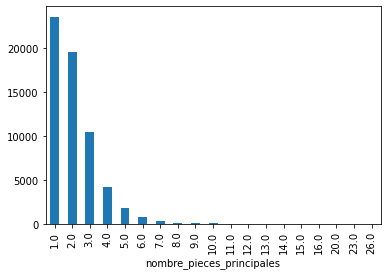

In [ ]:
df_min_paris.groupby("nombre_pieces_principales")['type_local'].count().plot(kind='bar')

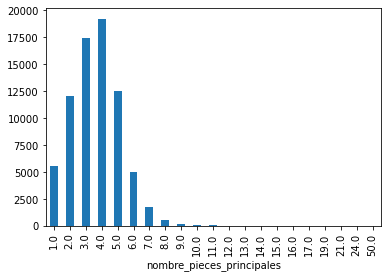

In [ ]:
df_min_nantes.groupby("nombre_pieces_principales")['type_local'].count().plot(kind='bar')

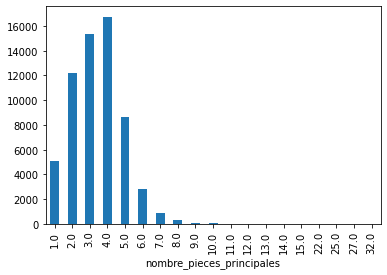

In [ ]:
df_min_toulouse.groupby("nombre_pieces_principales")['type_local'].count().plot(kind='bar')

Traitement de valeurs aberrantes : Paris


--------------------------------------------------------------------------


Treatment of outliers: Paris

In [ ]:
def borne(df):
  list_columns= ["valeur_fonciere", "Prix au m²(€)"]

  for elem in list_columns:
    q1=df[elem].quantile(q=0.25)
    #On calcule Q3
    q3=df[elem].quantile(q=0.75)
    #On calcule l'écart interquartile (IQR)
    IQR=q3-q1
    #On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
    borne_inf = q1-1.5*IQR
    #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
    borne_sup = q3 +1.5*IQR
    df = df[df[elem] < borne_sup]
    df = df[df[elem]>borne_inf]
  
  return df

In [ ]:
df_min_paris = borne(df_min_paris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


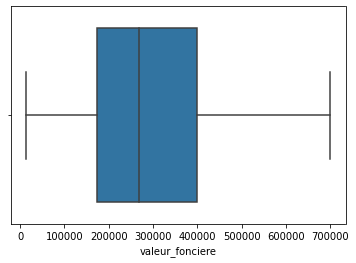

In [ ]:
import seaborn as sns 

sns.boxplot(df_min_paris['valeur_fonciere'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


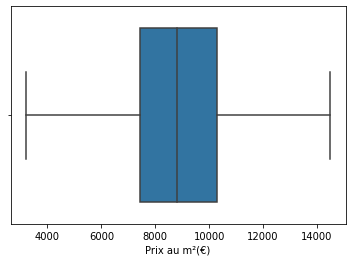

In [ ]:
sns.boxplot(df_min_paris['Prix au m²(€)'])

In [ ]:
#Paris 

df_min_paris= df_min_paris[(df_min_paris['valeur_fonciere']>0) & (df_min_paris['valeur_fonciere'] < 700500) & (df_min_paris['Prix au m²(€)']>3200) & (df_min_paris['Prix au m²(€)']<14500)]


Valeurs abérrantes Nantes

In [ ]:
df_min_nantes = borne(df_min_nantes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


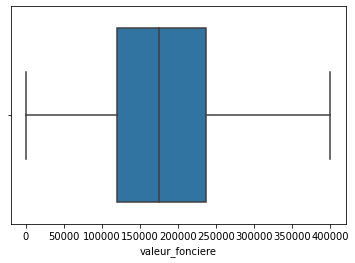

In [ ]:
sns.boxplot(df_min_nantes['valeur_fonciere'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


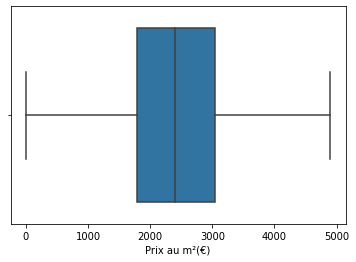

In [ ]:
sns.boxplot(df_min_nantes['Prix au m²(€)'])

In [ ]:
df_min_nantes= df_min_nantes[(df_min_nantes['valeur_fonciere']>0) & (df_min_nantes['valeur_fonciere'] < 400500) & (df_min_nantes['Prix au m²(€)']>0) & (df_min_nantes['Prix au m²(€)']<4900)]

In [ ]:
len(df_min_nantes)

66939

Valurs abérrantes : Toulouse

In [ ]:
df_min_toulouse = borne(df_min_toulouse)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


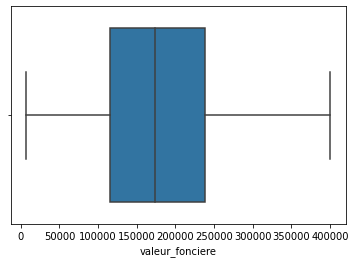

In [ ]:
sns.boxplot(df_min_toulouse['valeur_fonciere'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


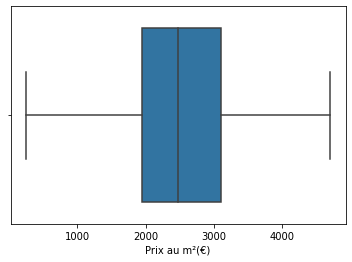

In [ ]:
sns.boxplot(df_min_toulouse['Prix au m²(€)'])

In [ ]:
df_min_toulouse= df_min_toulouse[(df_min_toulouse['valeur_fonciere']>0) & (df_min_toulouse['valeur_fonciere'] < 400500) & (df_min_toulouse['Prix au m²(€)']>250) & (df_min_toulouse['Prix au m²(€)']<4700)]

In [ ]:
len(df_min_toulouse)

56112

Filtre pour améliorer le model

In [ ]:
#Paris

#Ici on fait un filtre sur les donnnées pour rendre le modèle plus pertinent (supression des valeurs extrêmes etc)
##appart_old_paris=df_min_paris[(df_min_paris['type_local']=='Appartement') & (df_min_paris['nature_mutation']=='Vente')]
#appart_old_paris.reset_index(drop=True,inplace=True)
#maison_old_paris=df_min_paris[(df['type_local']=='Maison') & (df_min_paris['nature_mutation']=='Vente')]
#maison_old_paris=maison_old_paris[(maison_old_paris['valeur_fonciere']>20000)&(maison_old_paris['Prix au m²(€)']>100)&(maison_old_paris['surface_reelle_bati']>9)]
#maison_old_paris.reset_index(drop=True,inplace=True)
#local_old_paris =df_min_paris[(df_min_paris['type_local']=='Local industriel. commercial ou assimilé') & (df_min_paris['nature_mutation']=='Vente')]
#local_old_paris.reset_index(drop=True,inplace=True)
#appart_new_paris=df_min_paris[(df_min_paris['type_local']=='Appartement') & (df_min_paris['nature_mutation']=='Vente en l\'état futur d\'achèvement')]
#appart_new_paris.reset_index(drop=True,inplace=True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
df_min_paris.columns

Index(['valeur_fonciere', 'date_mutation', 'nature_mutation', 'code_postal',
       'latitude_r', 'longitude_r', 'type_local', 'surface_reelle_bati',
       'surface_terrain', 'Prix au m²(€)', 'Adresse',
       'nombre_pieces_principales', 'surface_terrain', 'label_nature_mutation',
       'label_type_local', 'Distance moyenne', 'Indices voisins'],
      dtype='object')

In [ ]:
df_test = df_min_paris

In [ ]:
df_min_paris.type_local.value_counts()

Appartement    45576
Name: type_local, dtype: int64

In [ ]:
df_min_paris.columns


Index(['valeur_fonciere', 'date_mutation', 'nature_mutation', 'code_postal',
       'latitude_r', 'longitude_r', 'type_local', 'surface_reelle_bati',
       'surface_terrain', 'Prix au m²(€)', 'Adresse',
       'nombre_pieces_principales', 'surface_terrain', 'Distance moyenne',
       'Indices voisins'],
      dtype='object')

In [ ]:
df_min_paris = df_min_paris.drop(columns=["label_nature_mutation", "label_type_local"])

Data Processing : Encodage binaire 


---------------------------------------------------------------------

Data Processing: Binary encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def preprocessing_label(df_label):
  df_label['label_nature_mutation'] = le.fit_transform(df_label["nature_mutation"])
  df_label['label_type_local'] = le.fit_transform(df_label["type_local"])
  return df_label

In [ ]:
df_min_paris = preprocessing_label(df_min_paris)

In [ ]:
df_min_nantes = preprocessing_label(df_min_nantes)

In [ ]:
df_min_toulouse = preprocessing_label(df_min_toulouse)

Améliorer le modèle machine learning

------------------------------------------------------

Improve the machine learning model

In [ ]:
from sklearn.neighbors import BallTree
df_min_paris["Distance moyenne"]=np.zeros(len(df_min_paris))
df_min_paris["Indices voisins"]=np.zeros(len(df_min_paris))
models={}
regions=df_min_paris.code_postal.unique()
for k in range(len(regions)):
    name= "appart" + str(regions[k])
    data=df_min_paris[df_min_paris.code_postal==regions[k]]
    data=data.reset_index(drop=True)
    models[k]=BallTree(data[["latitude_r", "longitude_r"]].values, leaf_size=2, metric="haversine")

In [ ]:
for k in range(len(regions)):
    data=df_min_paris[df_min_paris.code_postal==regions[k]]
    data=data.reset_index(drop=True)
    dist, indices = models[k].query(data[["latitude_r","longitude_r"]].values,k=10)
    data["Distance moyenne"]=np.mean(dist[:,1:]*6341,1)
    a=pd.DataFrame()
    a["Prix au m²(€"]=np.zeros(len(data))
for i in range(1,10):
    a+=pd.DataFrame(data.iloc[indices[:,i],:]["Prix au m²(€)"]).reset_index(drop=True)
    a=a/10
    data["Prix moyen du quartier"]=a.values
    

In [ ]:
df_min_paris.head(5)

,valeur_fonciere,date_mutation,nature_mutation,code_postal,latitude_r,longitude_r,type_local,surface_reelle_bati,surface_terrain,Prix au m²(€),Adresse,latitude,longitude
1798081,6000000,2016-05-19,Vente,75001,0.852699,0.040885,Appartement,225.0,0.0,26667,6920 QUAI DES ORFEVRES Paris 1er Arrondissem...,48.856026,2.342515
1798082,420000,2018-06-29,Vente,75001,0.852702,0.040880,Appartement,26.0,0.0,16154,6920 QUAI DES ORFEVRES Paris 1er Arrondissem...,48.856215,2.342274
1798083,930000,2018-12-10,Vente,75001,0.852704,0.040876,Appartement,5.0,0.0,186000,6920 QUAI DES ORFEVRES Paris 1er Arrondissem...,48.856363,2.342048
1798084,630000,2017-04-03,Vente,75001,0.852705,0.040878,Appartement,51.0,0.0,12353,2594 PL DAUPHINE Paris 1er Arrondissement 75...,48.856426,2.342125
1798085,398000,2018-12-19,Vente,75001,0.852705,0.040878,Appartement,21.0,0.0,18952,2594 PL DAUPHINE Paris 1er Arrondissement 75...,48.856426,2.342125


Prédiction du prix au mètre carré de la ville de Toulouse : 2020


-------------------------------------------------------------------------------

Toulouse city price per square meter prediction: 2020


In [ ]:
#prediction 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


y=df_min_toulouse['Prix au m²(€)']
X=df_min_toulouse.drop(columns=['valeur_fonciere', 'Prix au m²(€)', 'Adresse', 'type_local','nature_mutation', 'code_postal', 
                             'date_mutation'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
pipe.score(X_test, y_test)

0.6628717600726801

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6628717600726801